# First Order Form
One persistent thought about the SSH system is that it is *second* order, rather than *first* order as quantum and fluid dynamical systems that show topological protection.

So, answering the question is this two bands or four requires some more thought. 

We can write the acoustic SSH chain as 


$$F_n = -k_a (x_n - x_{n+1}) - k_b (x_n - x_{n-1}),\ n\ \mathrm{even}$$

$$F_n = -k_b (x_n - x_{n+1}) - k_a (x_n - x_{n-1}),\ n\ \mathrm{odd}$$

and then 
$$\ddot{x}_n = \frac{F_n}{m}.$$

However, we could also think of this as as an equivalent first order system,

$$\dot{\mathbf{X}}_n = \begin{bmatrix}v \\ F_n/m \end{bmatrix},$$

with $\mathbf{X}_n = \left[x_n\ v_n\right]^T$. Perhaps the best way to put this in first order form is via the Hamiltonian. We already have this coded up.

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy.fftpack as fpack
plt.style.use('prl')

`H` is not the Hamiltonian; it's the matrix for Newton's 2nd law form with $x_n \propto e^{i\omega_n t}$. This is what we take to be a "two band" system. We can write this as 

$$ -\omega^2 \mathbf{x} = \mathcal{H} \mathbf{x},$$

where again, $\mathcal{H}$ is *not* the Hamiltonian, but a matrix form of the forces on the coupled oscillator system. 

In [3]:
ko = 0.5
ke = 1
N = 32
H = utils.linear_operator(N, k1=ko, k2=ke)
omega, evecs = utils.efreq(H)


Thus, when we get $omega$, `utils.efreq()` is actually internally computing the square root of the eigenvalues to get $\omega$. But of course, there's actually two roots here, so we should really plot this as

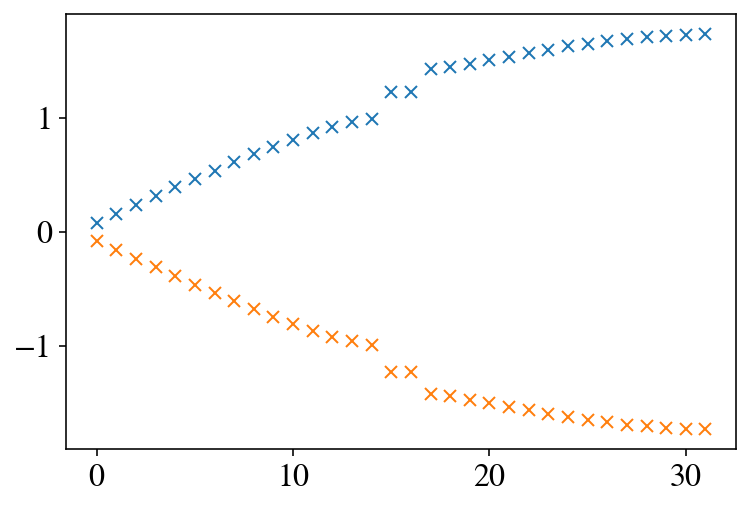

In [4]:
plt.plot(omega,'x')
plt.plot(-omega,'x')

In [7]:
Lf = np.block([[np.zeros((N,N)),np.diag(np.ones(N))],[H,np.zeros((N,N))]])

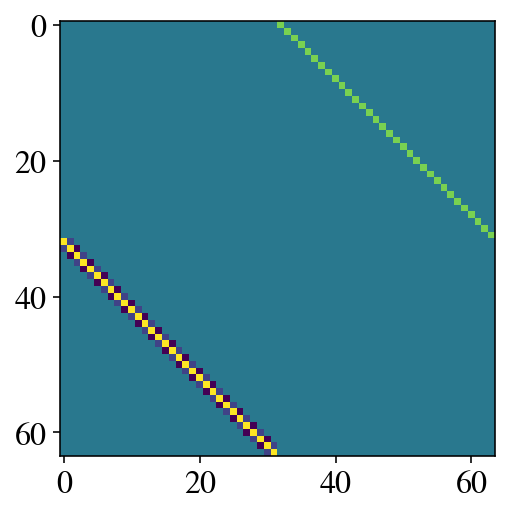

In [8]:
plt.imshow(Lf)

In [9]:
om1, evec1 = np.linalg.eig(Lf)
indx = np.argsort(om1)
om1= om1[indx]
evec1 = evec1[:,indx]
#om1 *=1j

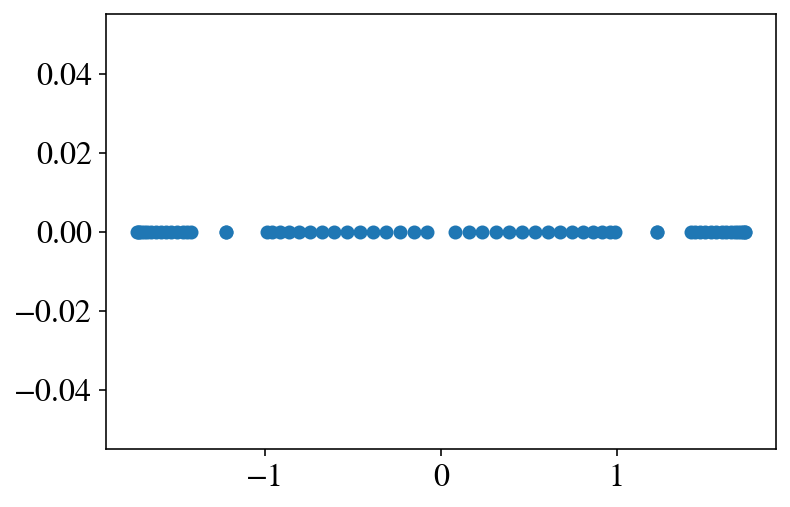

In [10]:
plt.scatter(om1.real,om1.imag)

In [12]:
kn = np.arange(32,0,-1)
kp = np.arange(1,33)
kk = np.concatenate([kn,kp])
print(kk)

[32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9
  8  7  6  5  4  3  2  1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]


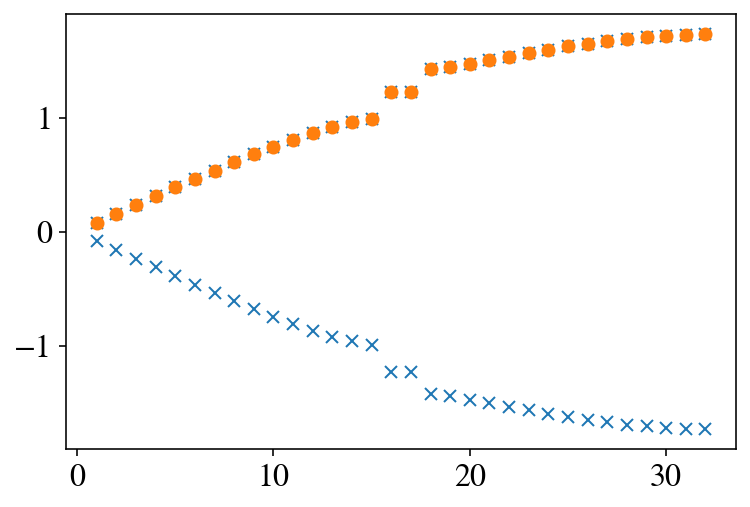

In [16]:
plt.plot(kk,om1, 'x')
plt.plot(kk[32:],omega,'o')

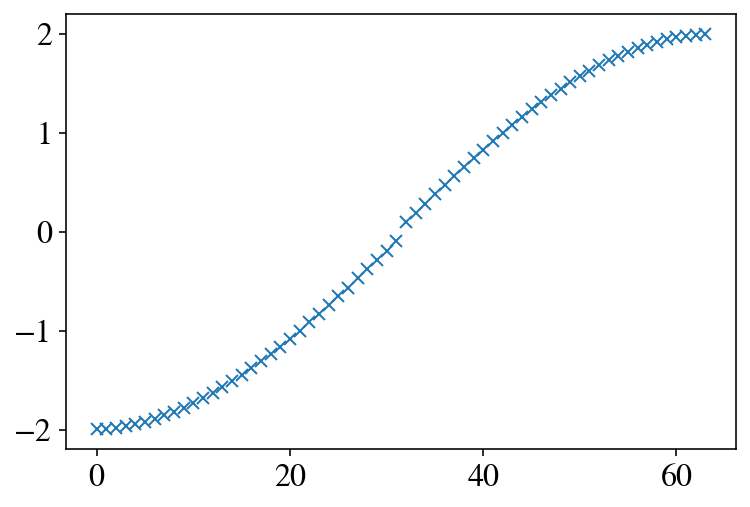

In [122]:
plt.plot(om1,'x')

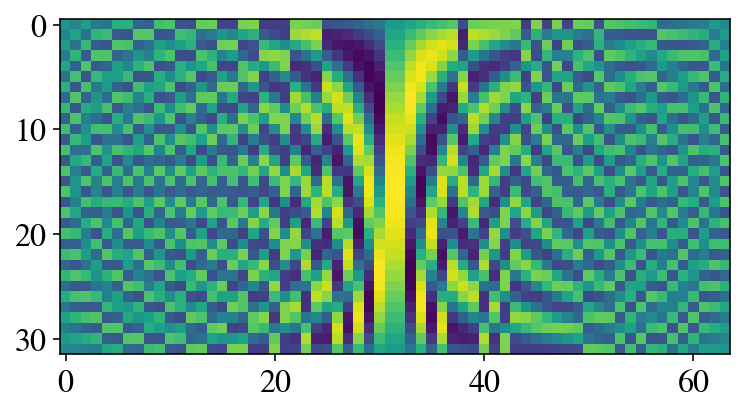

In [123]:
plt.imshow(evec1[:32,:])

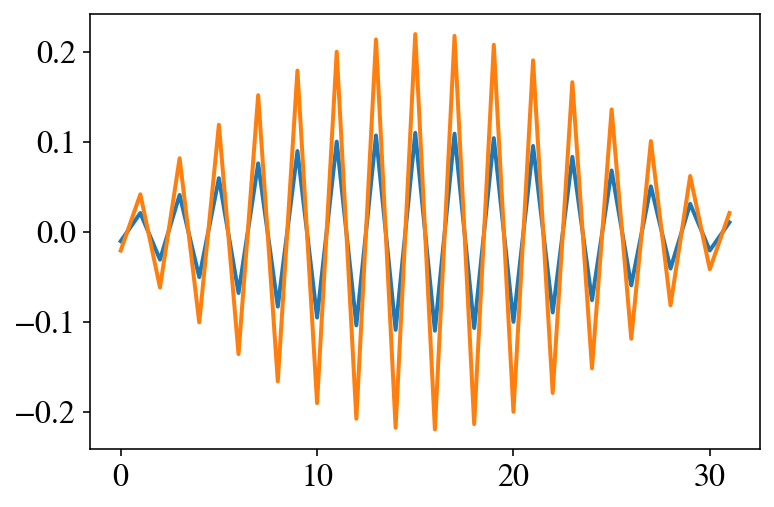

In [124]:
plt.plot(evec1[:32,-1])
plt.plot(evec1[32:,-1])

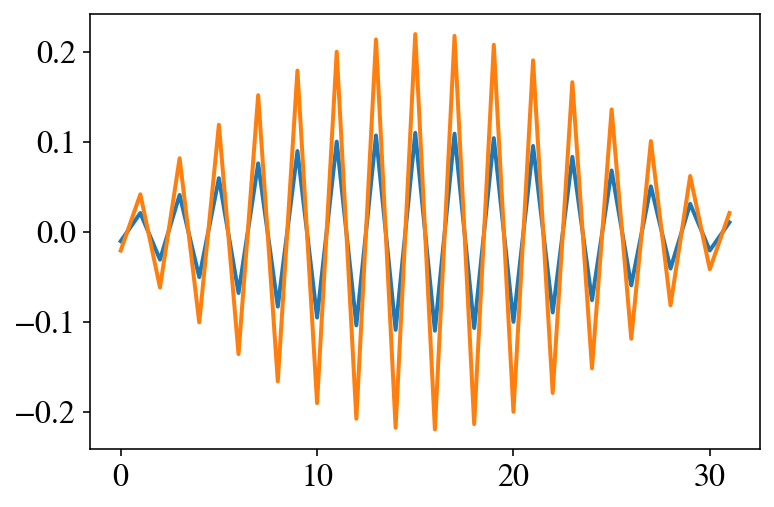

In [126]:
n = -1
plt.plot(evec1[:32,n])
plt.plot(evec1[32:,n])

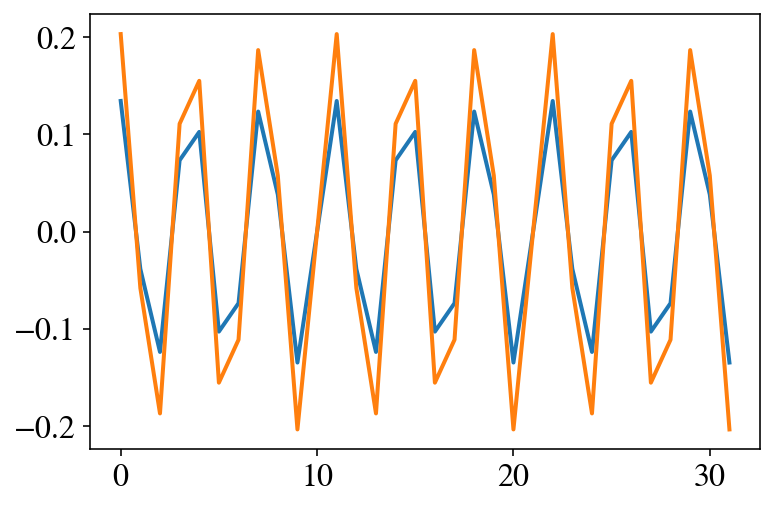

In [129]:
n = -15h
plt.plot(evec1[:32,n])
plt.plot(evec1[32:,n])